In [1]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Reading the Data file
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [3]:
# Features and Target Extraction
sentences = df['review'].values
y = df['label'].values

In [4]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [5]:
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [6]:
# Label Encoding the Target ,Splitting the data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [7]:
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [8]:
# Model Implementation
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 9s 31ms/step - loss: 0.8805 - acc: 0.5053 - val_loss: 0.8484 - val_acc: 0.5082
Epoch 2/5
293/293 [==============================] - 11s 38ms/step - loss: 0.7917 - acc: 0.5752 - val_loss: 0.8413 - val_acc: 0.5173
Epoch 3/5
293/293 [==============================] - 9s 29ms/step - loss: 0.6888 - acc: 0.6766 - val_loss: 0.8666 - val_acc: 0.5135
Epoch 4/5
293/293 [==============================] - 14s 49ms/step - loss: 0.5025 - acc: 0.8087 - val_loss: 0.9541 - val_acc: 0.5080
Epoch 5/5
293/293 [==============================] - 18s 60ms/step - loss: 0.2934 - acc: 0.9215 - val_loss: 1.0541 - val_acc: 0.5077


In [9]:
# Model Evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

782/782 [==============================] - 2s 3ms/step - loss: 1.0541 - acc: 0.5077
Evaluation result on Test Data : Loss = 1.0541346073150635, accuracy = 0.5077199935913086


In [10]:
# Loss and Accuracy Curve
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


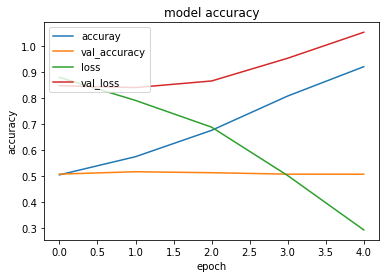

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [12]:
# Adding Embedding Layer
# Pre processing for Embedding Layer

from keras.preprocessing.sequence import pad_sequences
pureSentences = df['review'].values
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [13]:
# Model implementation adding Embedding Layer
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Model Evaluation
[test_loss1, test_acc1] = m.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Epoch 1/5
293/293 [==============================] - 242s 827ms/step - loss: 1.0744 - acc: 0.4891 - val_loss: 0.8665 - val_acc: 0.5008
Epoch 2/5
293/293 [==============================] - 196s 669ms/step - loss: 0.8497 - acc: 0.5119 - val_loss: 0.8591 - val_acc: 0.5020
Epoch 3/5
293/293 [==============================] - 193s 657ms/step - loss: 0.8108 - acc: 0.5400 - val_loss: 0.8497 - val_acc: 0.5024
Epoch 4/5
293/293 [==============================] - 191s 651ms/step - loss: 0.7453 - acc: 0.5985 - val_loss: 0.8736 - val_acc: 0.4920
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.9546 - acc: 0.4925
Evaluation result on Test Data : Loss = 0.9546014070510864, accuracy = 0.49248000979423523


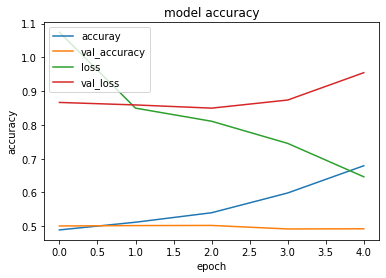

In [14]:
# Loss and Accuracy Curve after adding Embedding Layer
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [25]:
pred = m.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)

Actual Prediction 2 Predicted Prediction [2]
